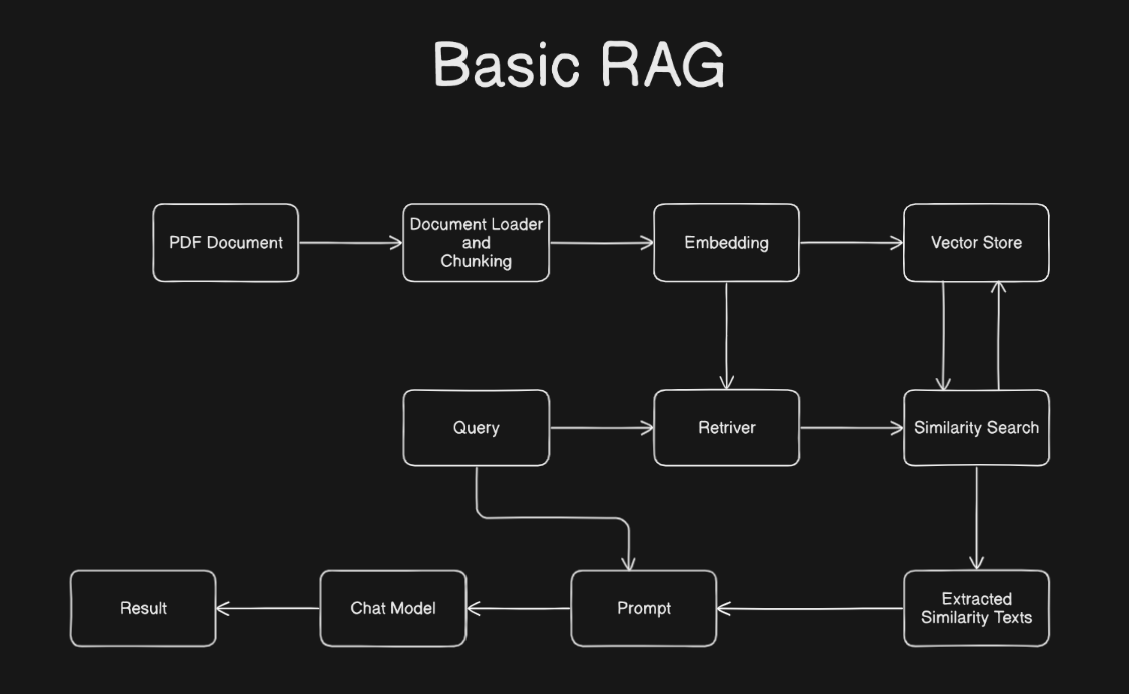

# Document Loader
Link - https://python.langchain.com/docs/integrations/document_loaders/

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

filepath = "C:/Users/tuhin/Downloads/attention.pdf"

loader = PyPDFLoader(filepath,mode='single')

document = loader.load() # loader.lazy_load()


In [21]:
print(document[0].page_content)

Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗†
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser ∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine translation tasks show these models to
be superior in quality while being more parallelizable and requiring signiﬁcantly
less time to train. Our model 

# Text Spliter
Link - https://python.langchain.com/docs/concepts/text_splitters/

In [22]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text = document[0].page_content
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_text(text)

In [25]:
print(len(texts))
texts[0]

41


'Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗†\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaiser ∗\nGoogle Brain\nlukaszkaiser@google.com\nIllia Polosukhin∗‡\nillia.polosukhin@gmail.com\nAbstract\nThe dominant sequence transduction models are based on complex recurrent or\nconvolutional neural networks that include an encoder and a decoder. The best\nperforming models also connect the encoder and decoder through an attention\nmechanism. We propose a new simple network architecture, the Transformer,\nbased solely on attention mechanisms, dispensing with recurrence and convolutions\nentirely. Experiments on two machine translation tasks show these models to\nbe superior in quality while being more parallelizable and requiring signiﬁcantl

In [31]:
## We can Do Both the Step Together 

# We already Have loader and splitter

documents=loader.load_and_split(text_splitter=text_splitter)

# Vector Store
Link - https://python.langchain.com/docs/integrations/vectorstores/

In [26]:
# Embedding 
from langchain_openai import OpenAIEmbeddings
from dotenv import load_dotenv
load_dotenv()

embedder = OpenAIEmbeddings(model="text-embedding-3-large")

In [ ]:
from langchain.vectorstores import Chroma

vector_store = Chroma(embedding_function=embedder,
                      persist_directory='chroma-db',
                      collection_name='sample'
                     )


C:\Users\tuhin\AppData\Local\Temp\ipykernel_14596\859576995.py:3: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vector_store = Chroma(embedding_function=embedder,
INFO: Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.


In [ ]:
vector_store.add_documents(documents=documents) 

INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


['965ada94-650b-4e88-bf28-ecb69a3999da',
 '901c88bb-102f-4edb-a0b6-9b85382f0897',
 '5827e5d4-d845-4098-92b2-31aca42975dc',
 'db7a69f4-3f29-463c-8282-0f6462ff8811',
 '5441624d-6ed6-48e4-9d10-a1409d9bad1e',
 '5fa15cfb-381e-4050-9e1c-f2b3397d3a39',
 '98f041bb-6ea6-43d5-af50-9033ab9994bc',
 'a0c6e3fb-367c-4bb4-a2e0-7e058fd6312e',
 '4c5e8f58-ba36-424d-a708-ed971e2c8fa4',
 '3c30a355-96c2-4262-b87f-6ab67c851ac5',
 '4d78fcb2-20f2-4619-9b6a-4606a8592998',
 '7dbf65ed-4e9f-4833-9f0e-d22aaa890c82',
 '58b85b49-c84c-44fc-819e-8c2c8f65df18',
 '856146ac-654e-49e1-8547-66a33f2ef0c1',
 '8993ad9a-fc10-49cd-a26e-94acd98e6e2b',
 'f2b02f44-bd4b-41fc-92cb-b2968fcd9463',
 'ce145c0c-2974-443d-a098-352364c83f1b',
 '375c2393-f821-4f58-b028-4bc9d491be99',
 'd00bca5c-af9a-4de8-ba9d-c70b729a8d79',
 'b54fdde8-df35-4b96-bc43-66f1942404b9',
 '3025ed72-4982-4962-b15b-5bf028254632',
 '2f2995cd-59dc-4145-a611-f62dadad85a6',
 'd0e252b0-1045-450e-b72f-399132c08c1a',
 '284fa8b6-fe19-4767-b60f-7c4d86713190',
 '7bb5aa2d-383e-

# Retrievers 
link - https://python.langchain.com/docs/concepts/retrievers/

In [ ]:
retriver= vector_store.as_retriever(search_type='mmr',
                                    kwargs={'k':5,'lambda_mult':0.5},
                                    )

In [57]:
filtered_result=retriver.invoke("Potato-tofee?")

INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


In [59]:
filtered_result

[Document(metadata={'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters, achieves 27.5 BLEU onEnglish-to-German translation, improving over the existing best ensemble result by over 1 BLEU. On English-to-French translation, we outperform the previoussingle state-of-the-art with model by 0.7 BLEU, achieving a BLEU score of 41.1.', 'type': 'Conference Proceedings', 'published': '2017', 'moddate': '2018-02-12T21:22:10-08:00',

In [47]:
context = ""
context=context.join(doc.page_content for doc in filtered_result)

# Manual Process

In [96]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI()

from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate(template="You are a helpful assistant, please give the answer of " \
"this query {query} from the given context and if it is not present the simpliy say you don't know\n context\n {context} ",
input_variables=['query','context'])

prompt_out=prompt.invoke({'query':"What is Potato-tofee?","context":context})
prompt_out


StringPromptValue(text='You are a helpful assistant, please give the answer of this query What is Potato-tofee? from the given context and if it is not present the simpliy say you don\'t know\n context\n 4\n\x0cMultiHead(Q,K,V ) = Concat(head1,..., headh)WO\nwhere headi = Attention(QWQ\ni ,KW K\ni ,VW V\ni )\nWhere the projections are parameter matricesWQ\ni ∈Rdmodel×dk , WK\ni ∈Rdmodel×dk , WV\ni ∈Rdmodel×dv\nand WO ∈Rhdv×dmodel .\nIn this work we employ h = 8 parallel attention layers, or heads. For each of these we use\ndk = dv = dmodel/h= 64. Due to the reduced dimension of each head, the total computational cost\nis similar to that of single-head attention with full dimensionality.\n3.2.3 Applications of Attention in our Model\nThe Transformer uses multi-head attention in three different ways:\n• In "encoder-decoder attention" layers, the queries come from the previous decoder layer,\nand the memory keys and values come from the output of the encoder. This allows every\nposition i

In [97]:
result=model.invoke(prompt_out)

INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [98]:
print(result.content)

I'm sorry, I don't know what Potato-tofee is based on the given context.


# Pipeline for RAG
### Query ----> Retriver ----> Prompt (Query + Retrived Content) ----> ChatLLM ----> Result

In [ ]:
def retrive_document(docs)->dict:
        extrated_text = "\n".join(doc.page_content for doc in docs)
        return extrated_text

In [92]:
# from langchain_core.messages import
def parse_template (kwrg: dict)-> str:
    
    query = kwrg['query']
    extracted_text = kwrg['retrived_texts']
    template = f'''
                assume yourself as a document assistant.
                answer this following question from given textes.
                and if it is not available in given textes then simply say you don't know, sorry for the inconveninos.
                question : {query}
                textes : {extracted_text} 
            '''
    
    return template
    

In [87]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI()

In [88]:
retriver= vector_store.as_retriever(search_type='mmr',
                                    kwargs={'k':5,'lambda_mult':0.5},
                                    )

In [89]:
retriver.invoke("what is runnable")

INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


[Document(metadata={'published': '2017', 'created': '2017', 'subject': 'Neural Information Processing Systems http://nips.cc/', 'source': 'C:/Users/tuhin/Downloads/attention.pdf', 'type': 'Conference Proceedings', 'total_pages': 11, 'creationdate': '', 'description': 'Paper accepted and presented at the Neural Information Processing Systems Conference (http://nips.cc/)', 'description-abstract': 'The dominant sequence transduction models are based on complex recurrent orconvolutional neural networks in an encoder and decoder configuration. The best performing such models also connect the encoder and decoder through an attentionm echanisms.  We propose a novel, simple network architecture based solely onan attention mechanism, dispensing with recurrence and convolutions entirely.Experiments on two machine translation tasks show these models to be superiorin quality while being more parallelizable and requiring significantly less timeto train. Our single model with 165 million parameters,

In [93]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser
chain =(
    {
    "query":RunnablePassthrough(),
    "retrived_texts":retriver|RunnableLambda(retrive_document)
    }| RunnableLambda(parse_template) | model| StrOutputParser()
)

In [94]:
result=chain.invoke("what is coffee mchine?")

INFO: HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [95]:
result

"I don't know, sorry for the inconvenience."